**What's the terminal velocity of a raindrop?**  
Nathan Moore, Winona State University

This is a "juypter notebook" which is essentially a python program with "markdown" text output.  Its something like a Mathematica notebookor Matlab program, but free. For an intro, see https://swcarpentry.github.io/python-novice-gapminder/01-run-quit/

In [1]:
# These are some libraries I'm going to use
from math import *
import matplotlib.pyplot as plt

Here are a few raindrop assumptions:

In [11]:
d=1.0 # water density, grams/cm^3
r=1.0 # radius, in mm
v=(4.0/3.0)*pi*radius**3 # volume, in mm^3
print("our raindrop has radius, r = ",radius,"mm")
print("this raindrop has volume, v = ", volume, "mm^3")
# note, to find mass, grams/cm^3) * (mm^3) *(1cm/10mm)^3 to make the units work
m = v*d*(1.0/(10.0**3)) # mass (grams)
print("this raindrop has mass, m = ",m,"grams")

our raindrop has radius, r =  1.0 mm
this raindrop has volume, v =  4.1887902047863905 mm^3
this raindrop has mass, m =  0.0041887902047863905 grams


Rain falls from clouds, and is subject to two main forces, a weight, $W=mg$, (gravitational attraction from the earth) and a drag force from the air molecules it runs into as it moves, $F_D$.  For sufficiently large raindrops, we can model for drag force with the following term. 

$F_D=0.5 C d A v^2$,

where $C=0.45$ for a sphere, $d=1.2kg/m^3$ is the density of air, $A=\pi r^2$ is the cross sectional area of the raindrop, and $v$ is the raindrop's speed.  

As the drop falls, it gains momentum because of the downward pull of the earth.  As the drop accelerates, the speed increases, and so does the drag force.  Eventually, the weight force from the earth and the drag force from the atmosphere equilibrate, and the drop reaches its *terminal velocity*, $v_T$, which can be computed by equating the two interactions.

$mg = 0.5 C d A (v_T)^2$

Or,

$v_T = \left[ \frac{2 m g}{C d A} \right]^{0.5}$.

Now, algebraically, $m=Volume*density_{water}=\frac{4}{3} \pi r^3 d_{w}$, and $A=\pi r^2$, so, the terminal velocity can be expressed as,

$v_T = \left[ \frac{2 \frac{4}{3} \pi r^3 d_{water} g}{C d_{air} \pi r^2} \right]^{0.5} = \left[ \frac{ 2 r g}{3C}\frac{ d_{water} }{ d_{air} } \right]^{0.5}$

Recall that the drag coefficient, $C=0.45$ has no units.  The other units in the terminal velocity expression are mixed and we'll have to work them out to plot the terminal speed.

$v_T = \left[ \frac{ 2 (1mm) (9.8m/s^2)}{3C}\frac{ 1 grams/cm^3 }{  1.2 kg/m^3 } \right]^{0.5}$


So then, at $r=1mm$ to make the conversions explicit:

$v_T = \left[ \frac{ 2 (1mm) (9.8m/s^2)~\frac{1m}{1000mm}}{3C} \frac{ 1 grams/cm^3 ~ \left(\frac{100cm}{1m}\right)^3 \frac{1kg}{1000g} }{  1.2 kg/m^3 } \right]^{0.5}$

In [13]:
g=9.8
C=0.45
r=1 # in mm
dw=1 # grams/cm^3
da=1.2 #  kg/m^3
v_T_sqr=(2*r*g/(3*C*1000))*(dw*100**3/(1000*da))
v_T=sqrt(v_T_sqr)
print("estimated terminal velocity for a r = ",r," mm raindrop is ",v_T,"m/s")

estimated terminal velocity for a r =  1  mm raindrop is  3.478327964999673 m/s


Ok, so now that we have an expression that seems to work, we'll make a plot that shows the terminal speed as a function of the raindrop size.

In [21]:
# plots require a list of points to plot
list_of_r=[] # list of radaii, in mm
list_of_v=[] # list of terminal velocities, in m/s

# this is a for (or for-each) loop.  It repeats the lines below with 
# i=0, i=1, i=2 ... up to but not including i=30
for i in range(30):
    # this is the repeated commands tat the forloop runs
    
    # vary the radius (in mm, incremented by 0.05mm steps)
    r=0.5+i*0.5
    #print(i,r)
    
    # save this loop's radius in a list
    list_of_r.append(r)
    
    # using the code above, compute the terminal velocity at this radius
    # note that we're using C,g,dw,da defined above
    v_T_sqr=(2*r*g/(3*C*1000))*(dw*100**3/(1000*da))
    v_T=sqrt(v_T_sqr)
    # and save this value as well
    list_of_v.append(v_T)

# end of tabbed in section means the loop is over

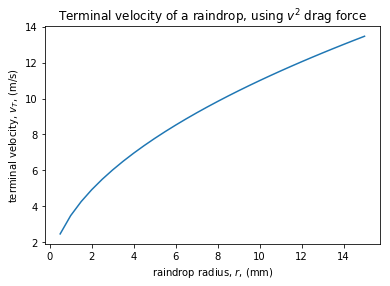

In [24]:
# now, make a plot
plt.plot(list_of_r,list_of_v)
plt.ylabel("terminal velocity, $v_T$, (m/s)")
plt.xlabel("raindrop radius, $r$, (mm)")
plt.title("Terminal velocity of a raindrop, using $v^2$ drag force")
plt.show()